## GLEIF Data Science Coding Excercise

Introduction:

The Legal Entity Identifier (LEI) is a unique global identifier for legal entities participating in
financial transactions. The Global Legal Entity Identifier Foundation (GLEIF) is responsible for monitoring LEI data quality and integrity of the LEI system.

Goal of this exercise is 
 1. To find out all Public Limited Companies (PLCs) in Great Britain
 2. Visualization of the EntityStatus and RegistrationStatus of all Public Limited Companies (PLCs) in Great Britain
 3. To find out ultimate parents of all PLCs
 4. To identify the duplicate LEIs of all entities in Great Britain

Data:

GLEIF’s Golden Copy files with content provide information on Legal Entity Identifiers (LEIs) and related reference data in a ready-to-use format.

We have 2 datasets for doing the exercises. 
1. LEI-CDF v3.1 files and
2. RR-CDF v2.1 files

#### Importing the Libraries

In [18]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#### Reading the data

In [4]:
import dask.dataframe as dd
df = dd.read_csv('data/gleif1.csv', dtype=str)

In [5]:
df.head(2)

,LEI,Entity.LegalName,Entity.LegalName.xmllang,Entity.OtherEntityNames.OtherEntityName.1,Entity.OtherEntityNames.OtherEntityName.1.xmllang,Entity.OtherEntityNames.OtherEntityName.1.type,Entity.OtherEntityNames.OtherEntityName.2,Entity.OtherEntityNames.OtherEntityName.2.xmllang,Entity.OtherEntityNames.OtherEntityName.2.type,Entity.OtherEntityNames.OtherEntityName.3,...,Registration.OtherValidationAuthorities.OtherValidationAuthority.2.ValidationAuthorityEntityID,Registration.OtherValidationAuthorities.OtherValidationAuthority.3.ValidationAuthorityID,Registration.OtherValidationAuthorities.OtherValidationAuthority.3.OtherValidationAuthorityID,Registration.OtherValidationAuthorities.OtherValidationAuthority.3.ValidationAuthorityEntityID,Registration.OtherValidationAuthorities.OtherValidationAuthority.4.ValidationAuthorityID,Registration.OtherValidationAuthorities.OtherValidationAuthority.4.OtherValidationAuthorityID,Registration.OtherValidationAuthorities.OtherValidationAuthority.4.ValidationAuthorityEntityID,Registration.OtherValidationAuthorities.OtherValidationAuthority.5.ValidationAuthorityID,Registration.OtherValidationAuthorities.OtherValidationAuthority.5.OtherValidationAuthorityID,Registration.OtherValidationAuthorities.OtherValidationAuthority.5.ValidationAuthorityEntityID
0,001GPB6A9XPE8XJICC14,FIDELITY ADVISOR SERIES I - Fidelity Advisor L...,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,004L5FPTUREIWK9T2N63,"Hutchin Hill Capital, LP",en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Checking the column names

In [71]:
df.columns

Index(['LEI', 'Entity.LegalName', 'Entity.LegalName.xmllang',
       'Entity.OtherEntityNames.OtherEntityName.1',
       'Entity.OtherEntityNames.OtherEntityName.1.xmllang',
       'Entity.OtherEntityNames.OtherEntityName.1.type',
       'Entity.OtherEntityNames.OtherEntityName.2',
       'Entity.OtherEntityNames.OtherEntityName.2.xmllang',
       'Entity.OtherEntityNames.OtherEntityName.2.type',
       'Entity.OtherEntityNames.OtherEntityName.3',
       ...
       'Registration.OtherValidationAuthorities.OtherValidationAuthority.2.ValidationAuthorityEntityID',
       'Registration.OtherValidationAuthorities.OtherValidationAuthority.3.ValidationAuthorityID',
       'Registration.OtherValidationAuthorities.OtherValidationAuthority.3.OtherValidationAuthorityID',
       'Registration.OtherValidationAuthorities.OtherValidationAuthority.3.ValidationAuthorityEntityID',
       'Registration.OtherValidationAuthorities.OtherValidationAuthority.4.ValidationAuthorityID',
       'Registration.Othe

**There are 337 columns present in this dataframe.**

In [6]:
df.shape

(Delayed('int-9237811b-bd7f-4ddf-a9fb-b394e5ec095b'), 337)

**The columns which are required from the above dataframe, for doing these excercise are;**

LEI

Entity.LegalName

Entity.LegalJurisdiction

Entity.LegalForm.EntityLegalFormCode

Entity.EntityStatus

Entity.RegistrationAuthority.RegistrationAuthorityEntityID

Entity.EntityCategory

Registration.RegistrationStatus

Registration.LastUpdateDate

#### Making a new dataframe with only required columns

In [8]:
df2 = df[["LEI", "Entity.LegalName", "Entity.LegalJurisdiction","Entity.LegalForm.EntityLegalFormCode", "Entity.EntityStatus", "Entity.RegistrationAuthority.RegistrationAuthorityEntityID",
 "Entity.EntityCategory", "Registration.RegistrationStatus", "Registration.LastUpdateDate"]]

In [9]:
df2.head(2)

,LEI,Entity.LegalName,Entity.LegalJurisdiction,Entity.LegalForm.EntityLegalFormCode,Entity.EntityStatus,Entity.RegistrationAuthority.RegistrationAuthorityEntityID,Entity.EntityCategory,Registration.RegistrationStatus,Registration.LastUpdateDate
0,001GPB6A9XPE8XJICC14,FIDELITY ADVISOR SERIES I - Fidelity Advisor L...,US-MA,8888,ACTIVE,S000005113,FUND,ISSUED,2022-05-20T09:35:00.000Z
1,004L5FPTUREIWK9T2N63,"Hutchin Hill Capital, LP",US-DE,T91T,ACTIVE,4386463,GENERAL,LAPSED,2020-07-17T12:40:00.000Z


In [10]:
df2.columns

Index(['LEI', 'Entity.LegalName', 'Entity.LegalJurisdiction',
       'Entity.LegalForm.EntityLegalFormCode', 'Entity.EntityStatus',
       'Entity.RegistrationAuthority.RegistrationAuthorityEntityID',
       'Entity.EntityCategory', 'Registration.RegistrationStatus',
       'Registration.LastUpdateDate'],
      dtype='object')

## Exercise 1: Find all Public Limited Companies (PLCs) in Great Britain


In the LEI data you can identify the legal form of an entity using the field ‘Entity.LegalForm.EntityLegalFormCode’. 
Public Limited Companies in Great Britain are assigned EntityLegalFormCode ‘B6ES’. 
Please identifiy all Public Limitied Companies (PLCs) in Great Britain.

**Creating a dataset of only the public limited companies in Great Britain which has a Entity Legal Form Code of "B6ES" and Entity Legal Jurisdiction name of "GB".**

In [101]:
df_plc = df2.loc[df2["Entity.LegalForm.EntityLegalFormCode"]== "B6ES"] # , df2["Entity.LegalJurisdiction"] == "GB"

In [90]:
df_plc.head()

,LEI,Entity.LegalName,Entity.LegalJurisdiction,Entity.LegalForm.EntityLegalFormCode,Entity.EntityStatus,Entity.RegistrationAuthority.RegistrationAuthorityEntityID,Entity.EntityCategory,Registration.RegistrationStatus,Registration.LastUpdateDate
3740,0TMBS544NMO7GLCE7H90,ABRDN PLC,GB,B6ES,ACTIVE,SC286832,GENERAL,ISSUED,2022-03-28T14:21:02.157Z
4389,2138001123F8QFPOZ919,TANGENT COMMUNICATIONS PLC,GB,B6ES,ACTIVE,03967805,GENERAL,LAPSED,2019-01-15T13:19:01.703Z
4429,21380011BEY3JSQ3AU68,PARSLEY BOX GROUP PLC,GB,B6ES,ACTIVE,SC685656,GENERAL,ISSUED,2022-03-22T04:13:11.243Z
4441,21380011EU95E93AQN91,SULNOX GROUP PLC,GB,B6ES,ACTIVE,08449586,GENERAL,ISSUED,2022-03-22T04:13:43.710Z
4468,21380011L2Y2O7QAFQ89,NORTHERN & SHELL PLC,GB,B6ES,ACTIVE,04086466,GENERAL,ISSUED,2022-04-25T08:03:08.680Z


**Checking the number of public limited companies**

In [91]:
rows_count = len(df_plc.index)
print(rows_count)

4146


**The row count indicates the number of rows which are present in this dataframe and it says that there are 4146 public limited companies are there in Great Britain.**

**The description of the dataframe is as follows.**

In [92]:
df_plc.describe(include=[object]).head()

,LEI,Entity.LegalName,Entity.LegalJurisdiction,Entity.LegalForm.EntityLegalFormCode,Entity.EntityStatus,Entity.RegistrationAuthority.RegistrationAuthorityEntityID,Entity.EntityCategory,Registration.RegistrationStatus,Registration.LastUpdateDate
unique,4146,4143,2,1,2,4133,3,5,3237
count,4146,4146,4146,4146,4136,4140,4146,4146,4146
top,0TMBS544NMO7GLCE7H90,Bristol Water PLC,GB,B6ES,ACTIVE,05379931,GENERAL,ISSUED,2022-02-23T15:28:32+00:00
freq,1,2,4145,4146,3913,2,4100,2854,144


In [104]:
df_plc["Registration.RegistrationStatus"].value_counts().head()

ISSUED              2854
LAPSED              1058
RETIRED              223
DUPLICATE             10
PENDING_ARCHIVAL       1
Name: Registration.RegistrationStatus, dtype: int64

In [105]:
df_plc["Entity.EntityStatus"].value_counts().head()

ACTIVE      3913
INACTIVE     223
Name: Entity.EntityStatus, dtype: int64

**Checking the information of the dataframe below and it shows that there are 6 columns and the type of all the columns are object (categorical)**

In [109]:
df_plc.info()

<class 'dask.dataframe.core.DataFrame'>
Columns: 9 entries, LEI to Registration.LastUpdateDate
dtypes: object(9)

**Checking for unique values**

In [96]:
df_plc.nunique().head()

LEI                                     4146
Entity.LegalName                        4143
Entity.LegalJurisdiction                   2
Entity.LegalForm.EntityLegalFormCode       1
Entity.EntityStatus                        2
dtype: int64

**The nunique() method returns the number of unique values for each column. Here you can see 4146 LEI, 4143 Entity legal names, 2 Legal Jurisdiction, 1 Entity legal form code, and 2 entity status are there. 4143 Legal name indicates that there are 3 legal names are similar with other legal names.**

In [110]:
# Checking for null values
df_plc.isnull().sum().head()

LEI                                      0
Entity.LegalName                         0
Entity.LegalJurisdiction                 0
Entity.LegalForm.EntityLegalFormCode     0
Entity.EntityStatus                     10
dtype: int64

**Here it shows that there are 10 values of Entity status are null values**

#### Checking the null values using a heatmap visualization

<AxesSubplot:>

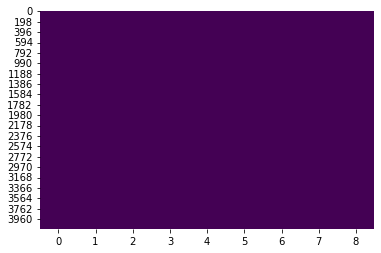

In [112]:
sns.heatmap(df_plc.isnull(),cbar=False,cmap='viridis')

The heatmap shows that there are no null values in this dataframe.

### Answer to Question 1:

**In the dataframe df_plc you can see all the Public limited companies in GB. 
There is a total number of 4146 of them in this dataset.**

## Exercise 2: Visualize the EntityStatus and RegistrationStatus of the entities you identified in exercise 1

Each LEI Record has an EntityStatus (Entity.EntityStatus) and a RegistrationStatus (Registration.RegistrationStatus). Based on your results from exercise 1, please 

visualize the EntityStatus and the RegistrationStatus for these LEI Records. 

Can you describe how the fields EntityStatus and RegistrationStatus are related to each other?

##### Checking for the value counts in the column "Registration status"

In [113]:
df_plc["Registration.RegistrationStatus"].value_counts().head()

ISSUED              2854
LAPSED              1058
RETIRED              223
DUPLICATE             10
PENDING_ARCHIVAL       1
Name: Registration.RegistrationStatus, dtype: int64

**Here it shows that there are 5 major categorical values are there in the column "Registration.RegistrationStatus". 
2854 ISSUED, 1058 LAPSED, 223 RETIRED, 10 DUPLICATE and 1 PENDING_ARCHIVAL are there.**

In [114]:
# Checking value counts of the column "Entity Status"
df_plc["Entity.EntityStatus"].value_counts().head()

ACTIVE      3913
INACTIVE     223
Name: Entity.EntityStatus, dtype: int64

In [115]:
#Renaming the column names
df4 = df_plc.rename(columns={"Entity.EntityStatus": "EntityStatus", "Entity.LegalJurisdiction":"LegalJurisdiction", 
"Registration.RegistrationStatus": "RegistrationStatus"})

In [116]:
df4.columns

Index(['LEI', 'Entity.LegalName', 'LegalJurisdiction',
       'Entity.LegalForm.EntityLegalFormCode', 'EntityStatus',
       'Entity.RegistrationAuthority.RegistrationAuthorityEntityID',
       'Entity.EntityCategory', 'RegistrationStatus',
       'Registration.LastUpdateDate'],
      dtype='object')

In [24]:
cleanup = {"RegistrationStatus":{"ISSUED": 1, "LAPSED": 0, "RETIRED": 2, "DUPLICATE": 3, "PENDING_ARCHIVAL": 4}, "EntityStatus":{"ACTIVE":1, "INACTIVE":0}}
df4 = df4.replace(cleanup)

In [25]:
df4.head(2)

,LEI,Entity.LegalName,LegalJurisdiction,Entity.LegalForm.EntityLegalFormCode,EntityStatus,Entity.RegistrationAuthority.RegistrationAuthorityEntityID,Entity.EntityCategory,RegistrationStatus,Registration.LastUpdateDate
3740,0TMBS544NMO7GLCE7H90,ABRDN PLC,GB,B6ES,1.0,SC286832,GENERAL,1,2022-03-28T14:21:02.157Z
4389,2138001123F8QFPOZ919,TANGENT COMMUNICATIONS PLC,GB,B6ES,1.0,03967805,GENERAL,0,2019-01-15T13:19:01.703Z


In [26]:
df4.tail(2)

,LEI,Entity.LegalName,LegalJurisdiction,Entity.LegalForm.EntityLegalFormCode,EntityStatus,Entity.RegistrationAuthority.RegistrationAuthorityEntityID,Entity.EntityCategory,RegistrationStatus,Registration.LastUpdateDate
93950,ZIMCVQHUFZ8GVHENP290,BUPA FINANCE PLC.,GB,B6ES,1,02779134,GENERAL,1,2022-01-11T21:31:00.000Z
93992,ZLECI7ED2QMWFGYCXZ59,ITV PLC,GB,B6ES,1,04967001,GENERAL,1,2021-07-22T15:31:00.000Z


In [117]:
df4["RegistrationStatus"].value_counts().head()

ISSUED              2854
LAPSED              1058
RETIRED              223
DUPLICATE             10
PENDING_ARCHIVAL       1
Name: RegistrationStatus, dtype: int64

#### Visualization of EntityStatus and the RegistrationStatus for these LEI Records

<AxesSubplot:xlabel='EntityStatus', ylabel='Count'>

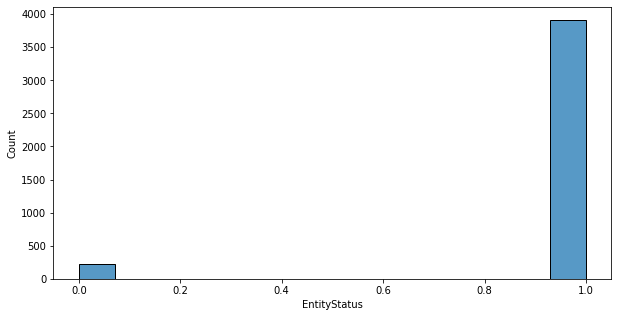

In [30]:
plt.figure(figsize=(10,5))
sns.histplot(x="EntityStatus", data=df4)


<AxesSubplot:xlabel='RegistrationStatus', ylabel='Count'>

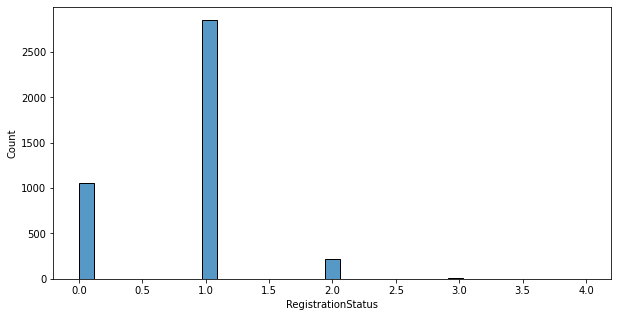

In [60]:
plt.figure(figsize=(10,5))
sns.histplot(x="RegistrationStatus", data=df4)

In [37]:
# plt.figure(figsize=(10,5))
# sns.countplot(x="LegalJurisdiction", hue="EntityStatus", data=df4)

In [ ]:
# plt.figure(figsize=(10,10))
# sns.heatmap(df3.corr(),cbar=True,annot=True,cmap='Blues')
# plt.title('Correlation heat map', fontweight='bold')

### Exercise 3: Find the ultimate parents of all entities from exercise 1

In exercise 1 and 2 we used the so-called LEI data (LEI-CDF v3.1 files). For exercise 3 we will additionally use the so-called relationship data (RR-CDF v2.1 files).

To identify an ultimate parent, you need to only consider those relationship records with
Relationship.RelationshipType ‘IS_ULTIMATELY_CONSOLIDATED_BY’. 

The Relationship.StartNode.NodeID indicates the child of a relationship. 
For this exercise we are only interested in those StartNodes that you have identified in exercise 1. 

The Relationship.EndNode.NodeID denotes the LEI code of the parent entity of the respective
StartNode.

How many ultimate parents did you find?
How would you explain “missing” ultimate parents?

In [67]:
df_LEI2 = dd.read_csv('data/20220614-0000-gleif-goldencopy-rr-golden-copy.csv', dtype=str)

In [68]:
df_LEI2.head()

,Relationship.StartNode.NodeID,Relationship.StartNode.NodeIDType,Relationship.EndNode.NodeID,Relationship.EndNode.NodeIDType,Relationship.RelationshipType,Relationship.RelationshipStatus,Relationship.Period.1.startDate,Relationship.Period.1.endDate,Relationship.Period.1.periodType,Relationship.Period.2.startDate,...,Relationship.Quantifiers.5.QuantifierAmount,Relationship.Quantifiers.5.QuantifierUnits,Registration.InitialRegistrationDate,Registration.LastUpdateDate,Registration.RegistrationStatus,Registration.NextRenewalDate,Registration.ManagingLOU,Registration.ValidationSources,Registration.ValidationDocuments,Registration.ValidationReference
0,010CMKZ3VON21WF2ZD45,LEI,ZZG38T0MDR3QY1ETUA76,LEI,IS_DIRECTLY_CONSOLIDATED_BY,ACTIVE,2018-01-01T00:00:00.000Z,2018-12-31T00:00:00.000Z,ACCOUNTING_PERIOD,2018-02-06T00:00:00.000Z,...,NaN,NaN,2012-10-01T11:09:00.000Z,2022-06-04T01:00:00.000Z,LAPSED,2022-06-03T13:04:00.000Z,EVK05KS7XY1DEII3R011,ENTITY_SUPPLIED_ONLY,SUPPORTING_DOCUMENTS,NaN
1,010CMKZ3VON21WF2ZD45,LEI,3C7474T6CDKPR9K6YT90,LEI,IS_ULTIMATELY_CONSOLIDATED_BY,ACTIVE,2020-01-01T00:00:00.000Z,2020-12-31T00:00:00.000Z,ACCOUNTING_PERIOD,2018-02-06T00:00:00.000Z,...,NaN,NaN,2012-10-01T11:09:00.000Z,2022-06-04T01:00:00.000Z,LAPSED,2022-06-03T13:04:00.000Z,EVK05KS7XY1DEII3R011,FULLY_CORROBORATED,REGULATORY_FILING,https://www.sec.gov/ix?doc=/Archives/edgar/dat...
2,010PWNH4K3BLIC3I7R03,LEI,549300COKYB5EGSU1838,LEI,IS_DIRECTLY_CONSOLIDATED_BY,ACTIVE,2020-01-01T00:00:00.000Z,2020-12-31T00:00:00.000Z,ACCOUNTING_PERIOD,2017-12-06T00:00:00.000Z,...,NaN,NaN,2012-11-26T15:01:00.000Z,2022-01-13T21:31:00.000Z,PUBLISHED,2022-10-21T15:08:00.000Z,EVK05KS7XY1DEII3R011,ENTITY_SUPPLIED_ONLY,SUPPORTING_DOCUMENTS,NaN
3,010PWNH4K3BLIC3I7R03,LEI,549300B2Q47IR0CR5B54,LEI,IS_ULTIMATELY_CONSOLIDATED_BY,ACTIVE,2020-01-01T00:00:00.000Z,2020-12-31T00:00:00.000Z,ACCOUNTING_PERIOD,2017-12-06T00:00:00.000Z,...,NaN,NaN,2012-11-26T15:01:00.000Z,2022-01-13T21:31:00.000Z,PUBLISHED,2022-10-21T15:08:00.000Z,EVK05KS7XY1DEII3R011,ENTITY_SUPPLIED_ONLY,SUPPORTING_DOCUMENTS,NaN
4,01J4SO3XTWZF4PP38209,LEI,5493000HPQ4D2RZ79739,LEI,IS_DIRECTLY_CONSOLIDATED_BY,ACTIVE,2012-06-06T00:00:00.000Z,NaN,RELATIONSHIP_PERIOD,2017-01-02T00:00:00.000Z,...,NaN,NaN,2017-11-30T16:35:59.285Z,2021-11-17T17:00:01.074Z,PUBLISHED,2022-12-01T17:12:02.687Z,5493001KJTIIGC8Y1R12,ENTITY_SUPPLIED_ONLY,OTHER_OFFICIAL_DOCUMENTS,NaN


In [69]:
df_LEI2.columns

Index(['Relationship.StartNode.NodeID', 'Relationship.StartNode.NodeIDType',
       'Relationship.EndNode.NodeID', 'Relationship.EndNode.NodeIDType',
       'Relationship.RelationshipType', 'Relationship.RelationshipStatus',
       'Relationship.Period.1.startDate', 'Relationship.Period.1.endDate',
       'Relationship.Period.1.periodType', 'Relationship.Period.2.startDate',
       'Relationship.Period.2.endDate', 'Relationship.Period.2.periodType',
       'Relationship.Period.3.startDate', 'Relationship.Period.3.endDate',
       'Relationship.Period.3.periodType', 'Relationship.Period.4.startDate',
       'Relationship.Period.4.endDate', 'Relationship.Period.4.periodType',
       'Relationship.Period.5.startDate', 'Relationship.Period.5.endDate',
       'Relationship.Period.5.periodType',
       'Relationship.Qualifiers.1.QualifierDimension',
       'Relationship.Qualifiers.1.QualifierCategory',
       'Relationship.Qualifiers.2.QualifierDimension',
       'Relationship.Qualifiers.2.Q

consider those relationship records with
Relationship.RelationshipType ‘IS_ULTIMATELY_CONSOLIDATED_BY’.

In [82]:
df_LEI3 = df_LEI2.loc[df_LEI2["Relationship.RelationshipType"]== "IS_ULTIMATELY_CONSOLIDATED_BY"]

In [83]:
df_LEI3.head()

,Relationship.StartNode.NodeID,Relationship.StartNode.NodeIDType,Relationship.EndNode.NodeID,Relationship.EndNode.NodeIDType,Relationship.RelationshipType,Relationship.RelationshipStatus,Relationship.Period.1.startDate,Relationship.Period.1.endDate,Relationship.Period.1.periodType,Relationship.Period.2.startDate,...,Relationship.Quantifiers.5.QuantifierAmount,Relationship.Quantifiers.5.QuantifierUnits,Registration.InitialRegistrationDate,Registration.LastUpdateDate,Registration.RegistrationStatus,Registration.NextRenewalDate,Registration.ManagingLOU,Registration.ValidationSources,Registration.ValidationDocuments,Registration.ValidationReference
1,010CMKZ3VON21WF2ZD45,LEI,3C7474T6CDKPR9K6YT90,LEI,IS_ULTIMATELY_CONSOLIDATED_BY,ACTIVE,2020-01-01T00:00:00.000Z,2020-12-31T00:00:00.000Z,ACCOUNTING_PERIOD,2018-02-06T00:00:00.000Z,...,NaN,NaN,2012-10-01T11:09:00.000Z,2022-06-04T01:00:00.000Z,LAPSED,2022-06-03T13:04:00.000Z,EVK05KS7XY1DEII3R011,FULLY_CORROBORATED,REGULATORY_FILING,https://www.sec.gov/ix?doc=/Archives/edgar/dat...
3,010PWNH4K3BLIC3I7R03,LEI,549300B2Q47IR0CR5B54,LEI,IS_ULTIMATELY_CONSOLIDATED_BY,ACTIVE,2020-01-01T00:00:00.000Z,2020-12-31T00:00:00.000Z,ACCOUNTING_PERIOD,2017-12-06T00:00:00.000Z,...,NaN,NaN,2012-11-26T15:01:00.000Z,2022-01-13T21:31:00.000Z,PUBLISHED,2022-10-21T15:08:00.000Z,EVK05KS7XY1DEII3R011,ENTITY_SUPPLIED_ONLY,SUPPORTING_DOCUMENTS,NaN
5,01J4SO3XTWZF4PP38209,LEI,5493000HPQ4D2RZ79739,LEI,IS_ULTIMATELY_CONSOLIDATED_BY,ACTIVE,2012-06-06T00:00:00.000Z,NaN,RELATIONSHIP_PERIOD,2017-01-02T00:00:00.000Z,...,NaN,NaN,2017-11-30T16:35:59.285Z,2021-11-17T17:00:01.074Z,PUBLISHED,2022-12-01T17:12:02.687Z,5493001KJTIIGC8Y1R12,ENTITY_SUPPLIED_ONLY,OTHER_OFFICIAL_DOCUMENTS,NaN
7,01TRDHWDCL69YP41S025,LEI,LORM1GNEU1DKEW527V90,LEI,IS_ULTIMATELY_CONSOLIDATED_BY,ACTIVE,2020-01-01T00:00:00.000Z,2020-12-31T00:00:00.000Z,ACCOUNTING_PERIOD,2018-04-17T00:00:00.000Z,...,NaN,NaN,2012-10-10T19:47:00.000Z,2022-04-05T23:32:00.000Z,PUBLISHED,2023-04-05T18:10:00.000Z,EVK05KS7XY1DEII3R011,FULLY_CORROBORATED,ACCOUNTS_FILING,https://www.sec.gov/Archives/edgar/data/898174...
8,020BQJXAXCZNLKIN7326,LEI,549300PFEWKNHRG25N08,LEI,IS_ULTIMATELY_CONSOLIDATED_BY,ACTIVE,2021-01-01T00:00:00.000Z,2021-12-31T00:00:00.000Z,ACCOUNTING_PERIOD,2018-03-01T00:00:00.000Z,...,NaN,NaN,2012-11-28T14:55:00.000Z,2022-03-15T21:32:00.000Z,PUBLISHED,2022-12-20T22:25:00.000Z,EVK05KS7XY1DEII3R011,PARTIALLY_CORROBORATED,SUPPORTING_DOCUMENTS,NaN


making a dataframe with only required columns

In [84]:
df_LEI4 = df_LEI3[["Relationship.StartNode.NodeID", "Relationship.StartNode.NodeIDType", "Relationship.EndNode.NodeID",
"Registration.RegistrationStatus", "Registration.LastUpdateDate"]]

In [85]:
df_LEI4.head()

,Relationship.StartNode.NodeID,Relationship.StartNode.NodeIDType,Relationship.EndNode.NodeID,Registration.RegistrationStatus,Registration.LastUpdateDate
1,010CMKZ3VON21WF2ZD45,LEI,3C7474T6CDKPR9K6YT90,LAPSED,2022-06-04T01:00:00.000Z
3,010PWNH4K3BLIC3I7R03,LEI,549300B2Q47IR0CR5B54,PUBLISHED,2022-01-13T21:31:00.000Z
5,01J4SO3XTWZF4PP38209,LEI,5493000HPQ4D2RZ79739,PUBLISHED,2021-11-17T17:00:01.074Z
7,01TRDHWDCL69YP41S025,LEI,LORM1GNEU1DKEW527V90,PUBLISHED,2022-04-05T23:32:00.000Z
8,020BQJXAXCZNLKIN7326,LEI,549300PFEWKNHRG25N08,PUBLISHED,2022-03-15T21:32:00.000Z


In [87]:
# df_combi = pd.merge(df3,df_LEI4, how='left',left_on=['LEI'],right_on='Relationship.StartNode.NodeID')

### Exercise 4: Identify potential duplicates in Great Britain


In the Global LEI System each legal entity shall only receive one unique LEI code. In some rare
cases it can happen that two LEI codes are assigned to the same legal entity. If such a duplicate
has been identified, one of the duplicate records will receive the RegistrationStatus DUPLICATE.
These duplicate records remain in the Global LEI repository, as the LEI is a life long identifier and
can never be reused. Please identify potential duplicates in the legal jurisdiction of Great Britain (GB) based on similar
legal names (Entity.LegalName).

What is your approach to compare the different legal names?

Which other elements of the reference data besides the legal name could be used to identify
duplicate records?

In [66]:
df3.head(2)

,LEI,Entity.LegalName,Entity.LegalJurisdiction,Entity.LegalForm.EntityLegalFormCode,Entity.EntityStatus,Entity.RegistrationAuthority.RegistrationAuthorityEntityID,Entity.EntityCategory,Registration.RegistrationStatus,Registration.LastUpdateDate
3740,0TMBS544NMO7GLCE7H90,ABRDN PLC,GB,B6ES,ACTIVE,SC286832,GENERAL,ISSUED,2022-03-28T14:21:02.157Z
4389,2138001123F8QFPOZ919,TANGENT COMMUNICATIONS PLC,GB,B6ES,ACTIVE,03967805,GENERAL,LAPSED,2019-01-15T13:19:01.703Z


#### Making the dataframe of LEI records of Great Britain

In [38]:
df_GB_only = df2.loc[df2["Entity.LegalJurisdiction"]== "GB"]

In [39]:
df_GB_only.head()

,LEI,Entity.LegalName,Entity.LegalJurisdiction,Entity.LegalForm.EntityLegalFormCode,Entity.EntityStatus,Entity.RegistrationAuthority.RegistrationAuthorityEntityID,Entity.EntityCategory,Registration.RegistrationStatus,Registration.LastUpdateDate
457,03EINY24LQ6IXW124R72,The Barclays Bank UK Retirement Fund,GB,8888,ACTIVE,NaN,FUND,ISSUED,2021-09-08T15:31:00.000Z
492,05MQKGBWLLX7RPPDO189,The Marketing Store Worldwide (Europe) Limited,GB,8888,ACTIVE,03909510,GENERAL,LAPSED,2020-06-24T15:28:00.000Z
495,05QPO0N3ERB8K0CJBG58,Invitrogen Europe Limited,GB,8888,ACTIVE,SC084330,GENERAL,LAPSED,2020-06-24T15:31:00.000Z
507,0677F7L8DTFEBS5RWE15,CARRINGGATE LIMITED,GB,H0PO,INACTIVE,06345337,GENERAL,RETIRED,2019-09-16T14:32:00.000Z
636,097900BFDR0000022278,HB REAVIS CONSTRUCTION UK LTD,GB,H0PO,ACTIVE,08917100,GENERAL,LAPSED,2022-03-17T20:47:46+01:00


In [77]:
rows_count = len(df_GB_only.index)
print(rows_count)

174168


There are total 174168 Legel entities from Great Britain are there which have registered in LEI system.

### Sorting the records based on Legal Entity Names

In [53]:
df_GB_sorted = df_GB_only.sort_values(by="Entity.LegalName")

In [54]:
df_GB_sorted.head()

,LEI,Entity.LegalName,Entity.LegalJurisdiction,Entity.LegalForm.EntityLegalFormCode,Entity.EntityStatus,Entity.RegistrationAuthority.RegistrationAuthorityEntityID,Entity.EntityCategory,Registration.RegistrationStatus,Registration.LastUpdateDate
89880,213800W2GKNSVZLCE195,"""D"" SETTLEMENT",GB,8888,ACTIVE,NaN,GENERAL,LAPSED,2019-04-09T10:39:15.940Z
63314,213800RI7ILMJ96BI869,"""K"" LINE BULK SHIPPING (UK) LIMITED",GB,H0PO,ACTIVE,04830352,GENERAL,ISSUED,2022-02-08T12:24:18.660Z
11891,2138002B9KGFAZZWWD88,"""K"" LINE LNG SHIPPING (UK) LIMITED",GB,H0PO,ACTIVE,05356484,GENERAL,ISSUED,2022-02-08T12:25:15.350Z
29431,529900J195MD2YN26W11,"""SQUARE METER"" PROPERTY & TRADING LLP",GB,Z0EY,ACTIVE,OC403986,GENERAL,ISSUED,2021-11-17T15:55:21+01:00
9690,9845008FB7FA96A73912,"""TRAVEL CRUISER"" CONCESSIONAIRES LIMITED",GB,H0PO,ACTIVE,01009135,GENERAL,ISSUED,2022-05-19T16:05:45+00:00


In [61]:
#df6 = df_GB_sorted.rename(columns={"Entity.LegalName": "LegalName"})

In [66]:
df_GB_dupl_names = df_GB_sorted[df_GB_sorted.duplicates('Entity.LegalName')]

AttributeError: 'DataFrame' object has no attribute 'duplicates'

#### Calculating the duplicates in LEI records of GB

In [42]:
df_GB_duplicate = df_GB_only.loc[df_GB_only["Registration.RegistrationStatus"] == "DUPLICATE"]


In [43]:
df_GB_duplicate.head()

,LEI,Entity.LegalName,Entity.LegalJurisdiction,Entity.LegalForm.EntityLegalFormCode,Entity.EntityStatus,Entity.RegistrationAuthority.RegistrationAuthorityEntityID,Entity.EntityCategory,Registration.RegistrationStatus,Registration.LastUpdateDate
3609,0KJU2QCDNZ4OB41DJ269,Invesco Perpetual Fixed Interest Investment Se...,GB,8888,NaN,NaN,GENERAL,DUPLICATE,2021-01-21T18:55:00.000Z
4796,21380013H52BEWNR1B48,M J DAWSON NO 2 SETTLEMENT,GB,8888,NaN,NaN,GENERAL,DUPLICATE,2022-03-23T04:45:19.047Z
6019,2138001B486RXXI3FA30,NORTHERN & SHELL PROPERTIES LIMITED,GB,H0PO,NaN,04104529,GENERAL,DUPLICATE,2022-03-24T07:45:44.393Z
6114,2138001BTNZOX64XMB06,LONDONDERRY 2014 GRANDCHILDREN'S SETTLEMENT RO...,GB,8888,NaN,NaN,GENERAL,DUPLICATE,2022-03-24T07:43:03.537Z
6206,2138001CDBJ4DD8QJO18,CHRISTOPHER GORDON HORSFALL SIMON 1964 SETTLEMENT,GB,8888,NaN,NaN,GENERAL,DUPLICATE,2022-03-24T07:38:44.517Z


In [55]:
rows_count = len(df_GB_duplicate.index)

In [56]:
print(rows_count)

523


523 duplicate records are found in the LEI record of Great Britain.

# Future Work